In [1]:
import pandas as pd
import sklearn
import sklearn.model_selection
import sys
sys.path.append('../')
import encoding
from utilities import *
from models.logreg import LogisticRegression
import torch

In [2]:
df = pd.read_csv("../datasets/rollouts.csv")
# Sample 1% of the dataset
df = df.sample(frac=0.1)
df

,FEN,Winner
97127,1k6/8/4P3/8/7N/8/1K6/8 w - - 3 133,1
70700,r1b1k1r1/N1q4p/p3nn2/2Qp2p1/1b1P2P1/4p3/P1pB1P...,0
64747,r1b2b1r/pp1qkP1p/n3p2P/2p1n3/P1P1P1p1/6P1/RPNP...,0
42253,1n2k3/r1qpp3/bpp3r1/pPP4B/P3PN2/2b1n3/3PKP1P/R...,0
23107,2B2b2/8/1p6/p2k4/P3p3/4Pp2/5K2/3b4 w - - 2 77,0
...,...,...
53698,rn1qk3/p2bbpp1/p1pr3n/3p2P1/1PP1N2p/P3B2P/3P3N...,0
80298,5k2/8/8/7B/6K1/3B4/8/7N b - - 22 138,1
61804,rnb1k2r/1p4b1/p3pppp/2p5/P1P2PRP/3PP3/RB1q2P1/...,0
79311,1K4nk/6r1/P2r3Q/8/P7/3P4/4R3/8 b - - 8 120,0


In [3]:
# Encode the dataset
chess_df = easy_encode(df, encoding.binary)
chess_df

100%|██████████| 10000/10000 [00:04<00:00, 2231.18it/s]


,0,1,2,3,4,5,6,7,8,9,...,764,765,766,767,768,769,770,771,772,Winner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
# https://pytorch.org/docs/stable/generated/torch.pca_lowrank.html
U, S, V = torch.pca_lowrank(torch.from_numpy(chess_df.iloc[:,:chess_df.columns.size-1].to_numpy()), 2)
chess_df = pd.concat([pd.DataFrame(chess_df.iloc[:,:chess_df.columns.size-1].to_numpy() @ V[:, :2].numpy()), chess_df.iloc[:,chess_df.columns.size-1]], axis=1)
print(chess_df.shape)
chess_df.head(10)

(10000, 3)


,0,1,Winner
0,-0.020394,-0.421145,1
1,2.140199,-0.838943,0
2,2.339993,-0.896822,0
3,1.823641,-0.436245,0
4,0.330980,-0.847188,0
5,5.010287,0.566158,1
6,0.199004,-0.356509,0
7,-0.027283,0.015575,1
8,1.826080,-1.489485,1
9,0.984966,-1.409338,1


Text(0.5, 1.0, 'Random 10% sample')

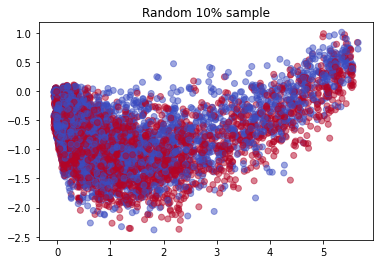

In [5]:
plt.scatter(chess_df[0], chess_df[1], c=chess_df["Winner"], cmap="coolwarm", alpha=0.5)
plt.title("Random 10% sample")